$dr_t = a(b-r_t)dt+\sigma\sqrt r_tdW_t$  
$r_{t+1} - r_t = a(b-r_t)\Delta t+\sigma\sqrt r_t(W_{t+1}-W_t)$  
  
Code Source: https://github.com/benWindsorCode/coxIngersollRossModel/blob/master/CIR.ipynb

In [1]:
import numpy as np

def generate_weiner_diffs(n, delta):
    return [np.random.normal(loc=0.0, scale=np.sqrt(delta)) for _ in range(n)]

def single_iter(rt, a, b, delta, sigma, weiner_diff):
    return rt + a*(b-rt)*delta + sigma*np.sqrt(rt)*weiner_diff

def run_sim(n, a, b, r0, sigma, delta):
    output = [ r0 ]
    weiner_diffs = generate_weiner_diffs(n, delta)
    for i in range(n):
        output.append(single_iter(output[i], a, b, delta, sigma, weiner_diffs[i]))
    return output

In [2]:
a = 1
b = 1.1
r0 = 0
sigma = 0.09
delta = 0.01
N = 800

test_run_1 = run_sim(N, a, b, r0, sigma, delta)
test_run_2 = run_sim(N, a, b, r0, sigma, delta)

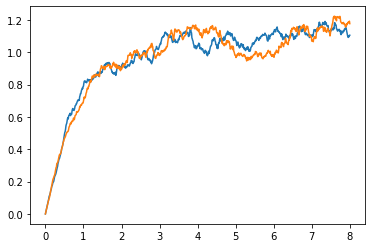

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

total_time = delta*N
time_axis = np.linspace(0, total_time, N+1) # N+1 to account for r0
plt.plot(time_axis.tolist(), test_run_1)
plt.plot(time_axis.tolist(), test_run_2)